In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Now navigate to your project folder
%cd /content/drive/MyDrive/Thesis_XAI/XAI


Mounted at /content/drive
/content/drive/MyDrive/Thesis_XAI/XAI


In [ ]:
import sys
print(sys.version)


3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]


In [ ]:
!pip uninstall -y tensorflow tensorflow-text tf-keras jax tensorstore ml-dtypes protobuf
!pip install "tensorflow==2.14.0" "numpy<2.0" "ml-dtypes==0.2.0" protobuf==4.25.3 --quiet --no-cache-dir
!pip install dl-backtrace graphviz lime shap --quiet
!pip install numpy==1.24.3 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.12.2 scikit-learn==1.3.2 scipy==1.10.1

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: tensorflow-text 2.18.1
Uninstalling tensorflow-text-2.18.1:
  Successfully uninstalled tensorflow-text-2.18.1
Found existing installation: tf_keras 2.18.0
Uninstalling tf_keras-2.18.0:
  Successfully uninstalled tf_keras-2.18.0
Found existing installation: jax 0.5.2
Uninstalling jax-0.5.2:
  Successfully uninstalled jax-0.5.2
Found existing installation: tensorstore 0.1.74
Uninstalling tensorstore-0.1.74:
  Successfully uninstalled tensorstore-0.1.74
Found existing installation: ml-dtypes 0.4.1
Uninstalling ml-dtypes-0.4.1:
  Successfully uninstalled ml-dtypes-0.4.1
Found existing installation: protobuf 5.29.5
Uninstalling protobuf-5.29.5:
  Successfully uninstalled protobuf-5.29.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 3.1 MB/s eta 0:00

In [ ]:
!pip install xai_evals

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 362, in run
    resolver = self.make_resolver(
               ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 177, in make_resolver
    return pip._internal.resolution.resolvelib.resolver.Resolver(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 58, in __init__
    self.factory = Factory(
                   ^^^^^^^^
  File "/usr/local/lib/py

KeyboardInterrupt: 

In [ ]:
!pip install dl-backtrace==0.0.19 --quiet --no-cache-dir


In [ ]:
from xai_evals.metrics import ExplanationMetricsTabular

In [ ]:
%pip install git+https://github.com/CN-TU/mdcgenpy.git

  Cloning https://github.com/CN-TU/mdcgenpy.git to /tmp/pip-req-build-uk4x3m9g
  Running command git clone --filter=blob:none --quiet https://github.com/CN-TU/mdcgenpy.git /tmp/pip-req-build-uk4x3m9g
  Resolved https://github.com/CN-TU/mdcgenpy.git to commit 809ba6d6ad8c873e63846e7822a897f108d60be2
  Preparing metadata (setup.py) ... done
  Created wheel for mdcgenpy: filename=mdcgenpy-1.0.0-py3-none-any.whl size=23987 sha256=0b1ce35e605a9022bc00c8e2f86214c8f3159a74a6cd7e9548bffa972b011bef
  Stored in directory: /tmp/pip-ephem-wheel-cache-gj4tcqag/wheels/d5/b3/c7/ca546ececed8eca2f1daa1ecd26f8f8526ab8ab85c8ad1b16d
Successfully built mdcgenpy


In [ ]:

import numpy as np
import pandas as pd
import shap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import mdcgenpy, pkgutil, inspect
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import json
import sys, os, importlib
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss
import mdcgenpy.clusters as clusters
#from xai_evals.metrics import ExplanationMetricsTabular
from sklearn.neural_network import MLPClassifier
import pickle
from sklearn.ensemble import RandomForestClassifier

In [ ]:
### OBS ###
# This is where datasets are loaded and thus, which data characteristic is experimented with
### OBS ###

path = "/content/drive/MyDrive/Thesis_XAI/XAI/syntheticdatasets_json/correlation_bi"

json_files = [pos_json for pos_json in os.listdir(path) if pos_json.endswith('.json')]
print(json_files)

['high_corr_06.json', 'medium_corr_07.json', 'high_corr_08.json', 'low_corr_04.json', 'low_corr_10.json', 'high_corr_09.json', 'low_corr_02.json', 'medium_corr_04.json', 'high_corr_05.json', 'no_corr_02.json', 'high_corr_03.json', 'high_corr_02.json', 'no_corr_07.json', 'no_corr_08.json', 'medium_corr_06.json', 'medium_corr_09.json', 'low_corr_01.json', 'low_corr_05.json', 'no_corr_01.json', 'medium_corr_10.json', 'low_corr_06.json', 'high_corr_01.json', 'no_corr_03.json', 'medium_corr_05.json', 'no_corr_05.json', 'medium_corr_03.json', 'medium_corr_08.json', 'medium_corr_01.json', 'no_corr_06.json', 'no_corr_10.json', 'low_corr_03.json', 'no_corr_04.json', 'low_corr_09.json', 'high_corr_04.json', 'no_corr_09.json', 'high_corr_07.json', 'high_corr_10.json', 'low_corr_08.json', 'medium_corr_02.json', 'low_corr_07.json']


In [ ]:
data = []

for files in json_files:
  with open(os.path.join(path, files), "r") as f:
    json_file = json.load(f)
    data.append(json_file)

print(data)


[{'seed': 6, 'n_samples': 6000, 'k': [3000, 3000], 'n_feats': 2, 'add_noise': 0, 'n_noise': [], 'corr': [0.95, 0.95], 'outliers': 0, 'possible_distributions': ['gaussian'], 'mv': True, 'compactness_factor': 0.25, 'rotate': True, 'alpha_n': 1.5, 'dflag': 0, 'scale': 0, 'silhouette_eval': False}, {'seed': 7, 'n_samples': 6000, 'k': [3000, 3000], 'n_feats': 2, 'add_noise': 0, 'n_noise': [], 'corr': [0.7, 0.7], 'outliers': 0, 'possible_distributions': ['gaussian'], 'mv': True, 'compactness_factor': 0.25, 'rotate': True, 'alpha_n': 1.5, 'dflag': 0, 'scale': 0, 'silhouette_eval': False}, {'seed': 8, 'n_samples': 6000, 'k': [3000, 3000], 'n_feats': 2, 'add_noise': 0, 'n_noise': [], 'corr': [0.95, 0.95], 'outliers': 0, 'possible_distributions': ['gaussian'], 'mv': True, 'compactness_factor': 0.25, 'rotate': True, 'alpha_n': 1.5, 'dflag': 0, 'scale': 0, 'silhouette_eval': False}, {'seed': 4, 'n_samples': 6000, 'k': [3000, 3000], 'n_feats': 2, 'add_noise': 0, 'n_noise': [], 'corr': [0.4, 0.4], '

In [ ]:
datasets = {}

for f in range(len(data)):
  dataset = clusters.ClusterGenerator(**data[f])

  corr = data[f]["corr"]
  seed = data[f]["seed"]


  X, y = dataset.generate_data()

  corr_value = corr[0]

  key = f"{corr_value}_{seed}"

  datasets[key] = {
      "correlation": corr,
      "seed": seed,
      "X": X,
      "y": y
    }


In [ ]:
corr_levels = ["0.95", "0.7", "0.4", "0.0"]
seeds = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]

'''for corr_level in corr_levels:
  for seed in seeds:
    describe_dataset(
        datasets[f"{corr_level}_{seed}"]["X"],
        datasets[f"{corr_level}_{seed}"]["y"],
        name=f'{corr_level}_{seed}')'''

'for corr_level in corr_levels:\n  for seed in seeds:\n    describe_dataset(\n        datasets[f"{corr_level}_{seed}"]["X"],\n        datasets[f"{corr_level}_{seed}"]["y"],\n        name=f\'{corr_level}_{seed}\')'

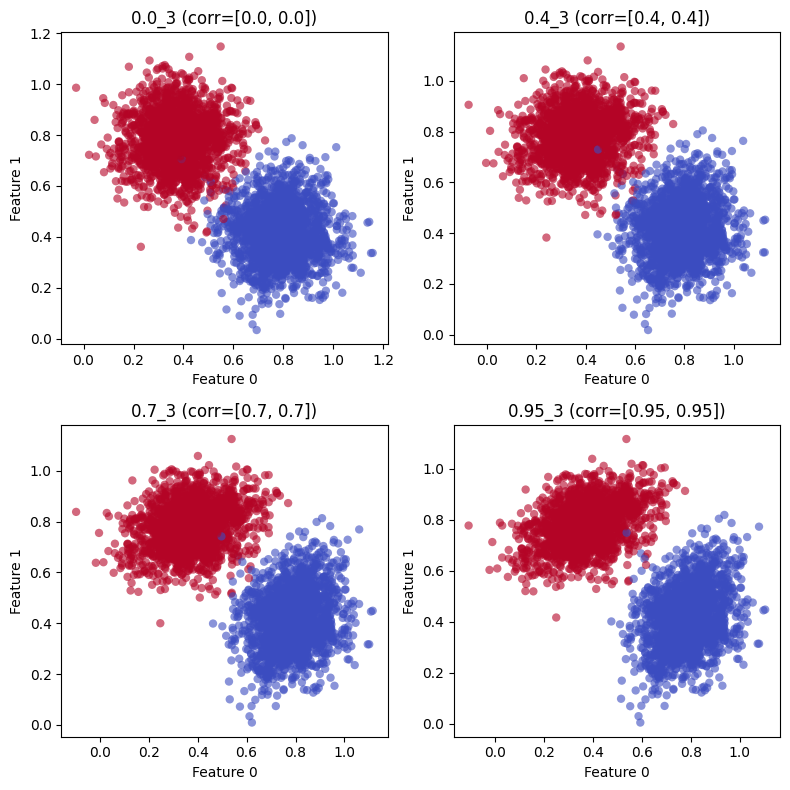

In [ ]:
import matplotlib.pyplot as plt

# define seed to show
seed = 3
levels = [0.0, 0.4, 0.7, 0.95]

example_keys = [f"{lvl}_{seed}" for lvl in levels if f"{lvl}_{seed}" in datasets.keys()]

# make scatterplot
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()

for ax, key in zip(axes, example_keys):
    X, y = datasets[key]["X"], datasets[key]["y"]
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", alpha=0.6, edgecolor="none")
    ax.set_title(f"{key} (corr={datasets[key]['correlation']})")
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

def realized_cluster_corr(X, y):
    """Compute Pearson correlation between feature 0 and 1 within each cluster."""
    out = {}
    for c in np.unique(y):
        Xc = X[y.ravel() == c]
        r = np.corrcoef(Xc[:, 0], Xc[:, 1])[0, 1]
        out[int(c)] = round(float(r), 4)
    return out


# Calculate per-cluster correlations for every dataset
correlation_levels = {
    key: realized_cluster_corr(d["X"], d["y"])
    for key, d in datasets.items()
}

# Print results
for k, v in correlation_levels.items():
    print(f"{k}: {v}")


0.95_6: {0: -0.0861, 1: 0.0279}
0.7_7: {0: 0.2775, 1: 0.0785}
0.95_8: {0: 0.1079, 1: 0.179}
0.4_4: {0: -0.0412, 1: 0.0464}
0.4_10: {0: -0.0079, 1: -0.1192}
0.95_9: {0: -0.1321, 1: 0.2392}
0.4_2: {0: -0.0293, 1: 0.0029}
0.7_4: {0: 0.0361, 1: 0.0437}
0.95_5: {0: -0.3678, 1: 0.0231}
0.0_2: {0: -0.0214, 1: -0.0033}
0.95_3: {0: 0.3052, 1: 0.3872}
0.95_2: {0: -0.0402, 1: 0.0921}
0.0_7: {0: -0.0161, 1: 0.015}
0.0_8: {0: -0.0237, 1: -0.0438}
0.7_6: {0: -0.0425, 1: 0.0199}
0.7_9: {0: -0.0997, 1: 0.135}
0.4_1: {0: 0.0199, 1: 0.0088}
0.4_5: {0: -0.1622, 1: 0.0308}
0.0_1: {0: 0.0213, 1: 0.0159}
0.7_10: {0: -0.0063, 1: -0.1485}
0.4_6: {0: -0.0091, 1: 0.0105}
0.95_1: {0: -0.1231, 1: -0.1795}
0.0_3: {0: 0.0096, 1: 0.0068}
0.7_5: {0: -0.2769, 1: 0.0266}
0.0_5: {0: -0.0067, 1: 0.0362}
0.7_3: {0: 0.2127, 1: 0.2473}
0.7_8: {0: 0.0734, 1: 0.0505}
0.7_1: {0: -0.0344, 1: -0.0632}
0.0_6: {0: 0.0059, 1: -0.0018}
0.0_10: {0: -0.0185, 1: -0.0373}
0.4_3: {0: 0.1145, 1: 0.1155}
0.0_4: {0: 0.0085, 1: 0.0413}
0.4_9

In [ ]:
'''from google.colab import files

filename = "correlation_levels_bi.pkl"
with open(filename, "wb") as f:
    pickle.dump(correlation_levels, f)

files.download(filename)
'''

In [ ]:
X_dfs = {}
y_dfs = {}

for corr_level in corr_levels:
  for seed in seeds:
    key = f"{corr_level}_{seed}"
    X =  pd.DataFrame.from_dict(
                  datasets[f"{corr_level}_{seed}"]["X"])

    y = pd.DataFrame.from_dict(
                  datasets[f"{corr_level}_{seed}"]["y"])

    X.rename(columns= {0:'zero', 1: "one", 2:"two", 3:"three", 4:"four", 5:"five", 6:"six", 7:"seven", 8:"eight", 9:"nine"}, inplace=True)

    X_dfs[key] = X
    y_dfs[key] = y



In [ ]:
split_seed = 42
train_ratio = 0.8

X_train_dict = {}
X_test_dict = {}
y_train_dict = {}
y_test_dict = {}

for corr_level in corr_levels:
  for seed in seeds:

    key = f"{corr_level}_{seed}"


    X_train, X_test, y_train, y_test = train_test_split(X_dfs[key],
                                                        y_dfs[key],
                                                        train_size=train_ratio,
                                                        stratify = y_dfs[key],
                                                        random_state = split_seed)

    X_train_dict[key] = X_train
    X_test_dict[key] = X_test
    y_train_dict[key] = y_train
    y_test_dict[key] = y_test



In [ ]:
for corr_level in corr_levels:
  for seed in seeds:

    key = f"{corr_level}_{seed}"

    y_train_dict[key] = y_train_dict[key].to_numpy().ravel()
    y_test_dict[key] = y_test_dict[key].to_numpy().ravel()

print(type(y_test_dict["0.95_1"]))
print(y_test_dict["0.95_1"].shape)


<class 'numpy.ndarray'>
(1200,)


In [ ]:
from sklearn.base import clone

MODEL_RANDOM_STATE = 99

# same hyperparameters for all datasets using same seed
base_nn_model = MLPClassifier(random_state=MODEL_RANDOM_STATE, max_iter=1000)
base_rf_model = RandomForestClassifier(n_estimators=100)
base_lm_model = LogisticRegression(random_state=MODEL_RANDOM_STATE, max_iter=1000)
base_gb_model = GradientBoostingClassifier(random_state=MODEL_RANDOM_STATE)

model_performance = {}  # store metrics per dataset key

models = {}
preds = {}
acc = {}
f1 = {}

for corr_level in corr_levels:
    for seed in seeds:

        key = f"{corr_level}_{seed}"

        # copy of the base model for specific dataset
        model = clone(base_lm_model)

        # fit model
        model.fit(X_train_dict[key], y_train_dict[key])

        # store trained model
        models[key] = model

        # calculate performance
        preds[key] = model.predict(X_test_dict[key])
        acc[key] = accuracy_score(y_test_dict[key], preds[key])
        f1[key] = f1_score(y_test_dict[key], preds[key], average="macro")

        # store performance for this key
        model_performance[key] = {
            "accuracy": acc[key],
            "f1": f1[key],
        }

        print(f"{corr_level}_{seed}")
        print(f'Accuracy: {acc[key]}\nf1: {f1[key]}')


0.95_1
Accuracy: 0.9991666666666666
f1: 0.9991666614583008
0.95_2
Accuracy: 0.9925
f1: 0.9924962012018583
0.95_3
Accuracy: 1.0
f1: 1.0
0.95_4
Accuracy: 0.9966666666666667
f1: 0.9966659164978786
0.95_5
Accuracy: 0.8866666666666667
f1: 0.8866666666666667
0.95_6
Accuracy: 0.9816666666666667
f1: 0.9816641709566023
0.95_7
Accuracy: 0.9791666666666666
f1: 0.9791659577305061
0.95_8
Accuracy: 0.9991666666666666
f1: 0.9991665364379851
0.95_9
Accuracy: 0.9008333333333334
f1: 0.9008178361202271
0.95_10
Accuracy: 0.9816666666666667
f1: 0.9816625407383328
0.7_1
Accuracy: 0.9991666666666666
f1: 0.9991666614583008
0.7_2
Accuracy: 0.9925
f1: 0.9924962012018583
0.7_3
Accuracy: 0.9991666666666666
f1: 0.9991664113801519
0.7_4
Accuracy: 0.9966666666666667
f1: 0.9966659164978786
0.7_5
Accuracy: 0.8783333333333333
f1: 0.8783211654498784
0.7_6
Accuracy: 0.9808333333333333
f1: 0.9808303380736574
0.7_7
Accuracy: 0.9766666666666667
f1: 0.9766650461837627
0.7_8
Accuracy: 0.9983333333333333
f1: 0.9983330369843527

In [ ]:
'''# save models and performances for lm/gb/nn_model
filename = "nn_model_performance.pkl"
with open(filename, "wb") as f:
    pickle.dump(model_performance, f)

files.download(filename)'''

In [ ]:
results = {}


for corr_level in corr_levels:
  for seed in seeds:

    key = f"{corr_level}_{seed}"

    results[key] = {
        "model": models[key],
        "accuracy": acc[key],
        "f1": f1[key]
    }


In [ ]:
import warnings, contextlib, os, pickle

metrics = {}
filenames = []

# stratified, fixed-count per class
def stratified_indices(y, per_class=10, rng=None):
    if rng is None:
        rng = np.random.default_rng(123)
    y = y.ravel()
    idxs = []
    for c in np.unique(y):
        cls_idx = np.where(y == c)[0]
        take = min(per_class, len(cls_idx))
        chosen = rng.choice(cls_idx, size=take, replace=False)
        idxs.append(chosen)
    idxs = np.concatenate(idxs)
    rng.shuffle(idxs)
    return idxs


INSTANCES_PER_CLASS = 25
rng_global = np.random.default_rng(123)

for corr_level in corr_levels:
    for seed in seeds:
        key = f"{corr_level}_{seed}"
        print("Running metrics for:", key)

        # pull per-dataset splits
        X_train = X_train_dict[key].values
        y_train = y_train_dict[key]
        X_test_full = X_test_dict[key].values
        y_test_full = y_test_dict[key]

        # make reproducible
        idx = stratified_indices(y_test_full, per_class=INSTANCES_PER_CLASS, rng=rng_global)
        X_test = X_test_full[idx]
        y_test = y_test_full[idx]

        feature_names = list(X_dfs[key].columns)

        em = ExplanationMetricsTabular(
            model=models[key],
            explainer_name="shap",
            X_train=shap.sample(X_train, 200),   # background from TRAIN only
            X_test=X_test,
            y_test=y_test,
            features=feature_names,
            task="binary-classification"
        )

        with warnings.catch_warnings():
            with open(os.devnull, "w") as devnull, \
                 contextlib.redirect_stdout(devnull), \
                 contextlib.redirect_stderr(devnull):
                result = em.calculate_metrics()

        metrics[key] = result
        del em

        filename = f"shap_gb_metrics_{corr_level}_seed_{seed}.pkl"
        with open(filename, "wb") as f:
            pickle.dump({key: result}, f)
        filenames.append(filename)


In [ ]:
import zipfile
from google.colab import files

zip_name = "shap_gb_metrics_bi.zip"

with zipfile.ZipFile(zip_name, "w") as z:
    for fname in filenames:
        z.write(fname)

files.download(zip_name)


# ONLY FOR SHAP FOR NN

In [ ]:
'''import warnings, contextlib, os, pickle

metrics = {}
filenames = []

# helper: stratified, fixed-count per class
def stratified_indices(y, per_class=10, rng=None):
    if rng is None:
        rng = np.random.default_rng(123)
    y = y.ravel()
    idxs = []
    for c in np.unique(y):
        cls_idx = np.where(y == c)[0]
        take = min(per_class, len(cls_idx))
        chosen = rng.choice(cls_idx, size=take, replace=False)
        idxs.append(chosen)
    idxs = np.concatenate(idxs)
    rng.shuffle(idxs)
    return idxs


INSTANCES_PER_CLASS = 25
rng_global = np.random.default_rng(123)

corr_level = "0.95"
seed = "10"

key = f"{corr_level}_{seed}"
print("Running metrics for:", key)

# pull per-dataset splits
X_train = X_train_dict[key].values
y_train = y_train_dict[key]
X_test_full = X_test_dict[key].values
y_test_full = y_test_dict[key]

# make a reproducible
idx = stratified_indices(y_test_full, per_class=INSTANCES_PER_CLASS, rng=rng_global)
X_test = X_test_full[idx]
y_test = y_test_full[idx]

feature_names = list(X_dfs[key].columns)

em = ExplanationMetricsTabular(
    model=models[key],
    explainer_name="shap",
    X_train=shap.sample(X_train, 200),   # background from TRAIN only
    X_test=X_test,
    y_test=y_test,
    features=feature_names,
    task="binary-classification"
    #subset_samples=False
)

with warnings.catch_warnings():
    with open(os.devnull, "w") as devnull, \
          contextlib.redirect_stdout(devnull), \
          contextlib.redirect_stderr(devnull):
        result = em.calculate_metrics()

metrics[key] = result
del em

filename = f"shap_nn_metrics_{corr_level}_seed_{seed}.pkl"
with open(filename, "wb") as f:
    pickle.dump({key: result}, f)
filenames.append(filename)
'''

In [ ]:
from google.colab import files
files.download(filename)